# Chapter09 独立同一分布

- 確率変数が互いに独立であるとは、
  - 確率変数がほかの確率変数に影響を及ぼさないこと。
- 独立同一分布（independently and identically distributed, i.i.d.）
  - お互いに独立で、さらにそれぞれが同じ確率分布に従う多次元確率変数のこと
  - それらが従う確率分を$F$とすると、
    - $X_1, X_2, ..., X_n \sim^{iid} F$
  - と表される。
  - 「同じ条件下で行われる実験や観測を複数回繰り返すことでデータを得る」ということを、数学の言葉で表したもの
  - 統計解析においてもっとも基本的でかつ重要な条件設定。

In [1]:
# ライブラリーの準備
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
import matplotlib.animation as ani
from IPython.display import HTML

plt.style.use('seaborn')
rcParams['font.family'] = 'IPAexgothic'
np.random.seed(0)
%precision 3
%matplotlib inline

In [2]:
# 離散型確率変数の関する関数
linestyles = ['-', '--', '-.']

def E(XY, g):
    """2次元の離散型確率変数の期待値"""
    x_set, y_set, f_XY = XY
    return np.sum([
        g(x_i, y_j) * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set
    ])

def Cov(XY):
    """2次元の離散型確率変数の共分散"""
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([
        (x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set
    ])

def f_X(x):
    """確率変数Xの周辺分布"""
    return np.sum([
        f_XY(x, y_k) for y_k in y_set
    ])

def f_Y(y):
    """確率変数Yの周辺分布"""
    return np.sum([
        f_XY(x_k, y) for x_k in x_set
    ])

## 9.1 | 独立性

### 9.1.1 独立性の定義

- 確率変数の独立性（independence）とは
  - 2つ以上の確率変数が互いに影響を及ぼさず無関係であることを表す概念

2次元確率変数$(X, Y)$の場合、次のような関係が成り立つことを、**独立である**という。

$$
f_{X, Y}(x, y) = f_X(x)f_Y(y)
$$

すなわち、確率変数が独立なとき、同時確率は周辺確率の積で書くことができる。

#### 独立性

n個の確率変数 $X_1, X_2, ..., X_n$ が、

$$
f_{X_1, X_2, ..., X_n}(x_1, x_2, ..., x_n) = 
f_{X_1}(x_1)f_{X_2}(x_2)...f_{X_n}(x_n)
$$

を満たすとき、$X_1, X_2, ..., X_n$は互いに独立であるという。

ただし、関数$f$は、

- 離散型であれば、確率関数
- 連続型であれば、密度関数

を表す。

### 9.1.2 独立性と無相関性

- 共分散や相関係数が「0」のとき、
  - 2つの確率変数の間に、相関性がないことを表している。
  - 相関性がないとは、直線的な関係がないこと。

- 無相関性より独立性のほうが強い概念
  - 2つの確率変数$XとY$が「独立なとき」、$XとY$は「無相関」。
  - 2つの確率変数$XとY$が「無相関なとき」$XとY$は「必ずしも独立とはなっていない」。
    - 2つの確率変数の間に直線的な関係はないものの、影響を及ぼし合う場合がある。

#### 2つの確率変数$XとY$が「独立なとき」、$XとY$は「無相関」

In [3]:
x_set = np.array([1, 2, 3, 4, 5, 6])
y_set = np.array([1, 2, 3, 4, 5, 6])

def f_XY(x, y):
    """2つのいかさまサイコロの期待値"""
    if x in x_set and y in y_set:
        return x * y / 441
    else:
        return 0

# 確率変数の定義
XY = [x_set, y_set, f_XY]

In [4]:
Cov(XY)

-0.000

独立性の定義はすべての$x, y$に対して、

$$
f_{X, Y}(x, y) = f_X(x)f_Y(y)
$$

が成り立つ。

ここで、$x = 1, y = 1$を代入して、

$$
f_{X, Y}(1, 1) = f_X(1)f_Y(1)
$$

が成り立つか確認する。

In [5]:
f_XY(1, 1), f_X(1) * f_Y(1)

(0.002, 0.002)

等式が成り立っている、$XとY$は独立。

#### 2つの確率変数$XとY$が「無相関なとき」$XとY$は「必ずしも独立とはなっていない」

- 無相関なのに、独立でない例
  - とりうる値の組み合わせが$\{(0, 0), (1, 1), (1, -1)\}$で、
  - それぞれの確率が等しい2次元確率変数$(X, Y)$を使う。

$$
f_{XY}(x, y) = 
\begin{cases}
\begin{align*}
1/3 ~~~ &(~(x, y) \in \{(0, 0), (1, 1), (1, -1)\}~)
\\
0 ~~~~~ &(otherwise)
\end{align*}
\end{cases}
$$

In [6]:
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

def f_XY(x, y):
    if (x, y) in [(0, 0), (1, 1), (1, -1)]:
        return 1 / 3
    else:
        return 0

XY = [x_set, y_set, f_XY]

In [7]:
Cov(XY)

0.000

独立性の定義はすべての$x, y$に対して、

$$
f_{X, Y}(x, y) = f_X(x)f_Y(y)
$$

が成り立つ。

ここで、$x = 0, y = 0$を代入して、

$$
f_{X, Y}(0, 0) = f_X(0)f_Y(0)
$$

が成り立つか確認する。

In [8]:
f_XY(0, 0), f_X(0) * f_Y(0)

(0.333, 0.111)

等式が成り立っていないため、$XとY$は独立ではない。

## | 9.2 和の分布

- 和の分布
  - 互いに独立に同一の確率分布に従う「確率変数 $X_1, X_2, ..., X_n$」の<br>
    「和 $\sum_{i=1}^{n} X_i = X_1 + X_2 + ... + X_n$」が従う確率分布のこと

### 確率変数の和の期待値

和の分布の期待値は、それぞれの確率変数の期待の和で計算できる。

確率変数 $X_1, X_2, ..., X_n$ について、

$$
E(X_1 + X_2 + ... + X_n) = E(X_1) + E(X_2) + ... + E(X_n)
$$

が成り立つ。

※この公式は確率変数が独立でなくても成り立つ。

### 確率変数の和の分散

和の分布の分散も、それぞれの確率変数の分散の和で計算できる。

確率変数 $X_1, X_2, ..., X_n$ が互いに独立ならば、

$$
V(X_1 + X_2 + ... + X_n) = V(X_1) + V(X_2) + ... + V(X_n)
$$

が成り立つ。

### 9.2.1 正規分布の和の分布

- 2つの互いに独立な確率変数 $X \sim N(1, 2) と Y \sim N(2, 3)$
- 期待値は、$E(X + Y) = E(X) + E(Y) = 3$
- 分散は、$V(X + Y) = V(X) + V(Y) = 5$ 

In [9]:
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(3.003, 4.996)

- 正規分布に関しては、正規分布の和もまた正規分布になるという性質をもっている。
- 再生性
  - 同じ確率分布に従う2つの独立な確率変数に対して、その和もまた同じ確率分布になる性質のこと
  - 再生性はすべての確率分布がもつ性質ではない

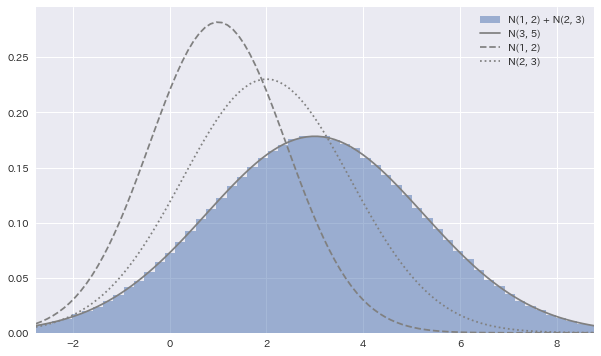

In [11]:
# 図 9.1: 正規分布の和
# X + Y から無作為抽出した標本データのヒストグラムと
# N(3, 5) の密度関数

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(
    sum_sample, bins=100, density=True,
    alpha=0.5, label='N(1, 2) + N(2, 3)'
)
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray')

ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
ax.legend()
plt.show()

#### 正規分布の和の分布

互いに独立な確率変数 
$X_1 \sim N(\mu_1, \sigma_1^2), ~ X_2 \sim N(\mu_2, \sigma_2^2), ..., ~ X_n \sim N(\mu_n, \sigma_n^2),$ について、

$$
\sum_{i=1}^{n} X_i \sim 
N \left( \sum_{i=1}^{n}\mu_i, ~ \sum_{i=1}^{n}\sigma_i^2 \right)
$$

が成り立つ。

### 9.2.2 ポアソン分布の和の分布

- 2つの互いに独立な確率変数 $X \sim Poi(3) と Y \sim Poi(4)$
- $Poi(\lambda)$ の期待値と分散は、「$\lambda$」

In [12]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)


(6.999, 6.990)

/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_1484/1661924347.py:11: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(


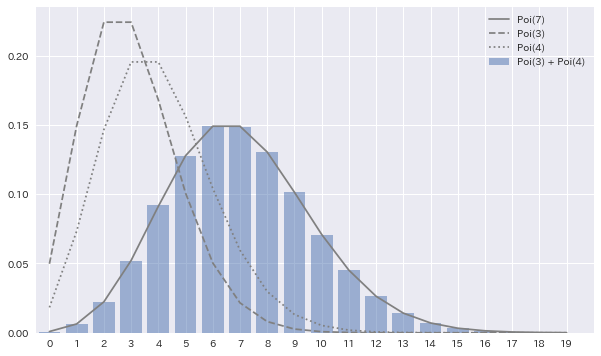

In [13]:
# 図 9.2: ポアソン分布の和
# X + Y から無作為抽出した標本データのヒストグラムと
# Poi(7) の密度関数

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)

hist, _ = np.histogram(
    sum_sample, bins=20,
    range=(0, 20), normed=True
)
ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)', color='gray')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':', color='gray')

ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
ax.legend()
plt.show()


#### ポアソン分布の和の分布

互いに独立な確率変数 
$X_1 \sim Poi(\lambda_1), ~ X_2 \sim Poi(\lambda_2), ..., ~ X_n \sim Poi(\lambda_n),$ について、

$$
\sum_{i=1}^{n} X_i \sim 
Poi \left( \sum_{i=1}^{n}\lambda_i \right)
$$

が成り立つ。

### 9.2.3 ベルヌーイ分布の和の分布

- $X_1, X_2, ..., X_10 \sim i.i.d Bern(0.3)$ としたときの $\sum_{i=1}^{10} X_i$ を考える。
- $Bern(p)$の期待値は $p$、分散は $p(1-p)$
- $\sum_{i=1}^{10} X_i$ の期待値は $10 * 0.3 = 3$、
- 分散は $10 * 0.3 * (1 - 0.3) = 2.1$

In [14]:
p = 0.3
rv = stats.bernoulli(p)

sum_sample = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.999, 2.095)

- ベルヌーイ分布には、再生性はない。
- ベルヌーイ分布の和は二項分布になる。
- 二項分布のパラメータは、「$n, p$」。

$\sum_{i=1}^{10} X_i$ から無作為抽出した標本データのヒストグラムと

$Bin(10, 0.3)$ の確率関数を図示する。

/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_1484/3613948633.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(


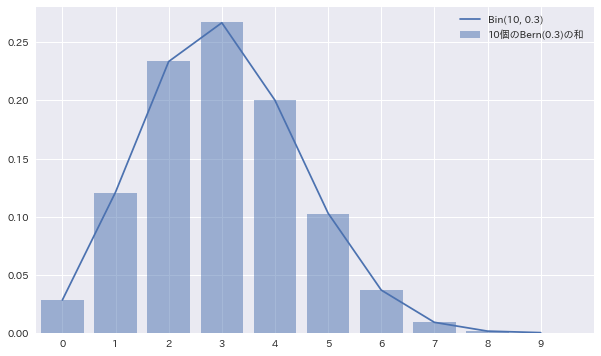

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)

hist, _ = np.histogram(
    sum_sample, bins=10,
    range=(0, 10), normed=True
)
ax.bar(xs, hist, alpha=0.5, label='10個のBern(0.3)の和')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')

ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
ax.legend()
plt.show()

#### ベルヌーイ分布の和の分布

$X_1, X_2, ..., X_10 \sim i.i.d ~ Bern(p)$ について、

$$
\sum_{i=1}^{n} X_i \sim Bin(n, p)
$$

が成り立つ。

## 9.3 | 標本平均の分布

- 標本平均の分布とは、
  - 互いに独立に同一の確率分布に従う確率変数 $X_1, X_2, ..., X_n$ の標本平均 $\overline{X} = \frac{X_1 + X_2 + ... + X_n}{n}$ が従う分布。
  - 母平均の区間推定や、母平均の検定で使う分布。

標本平均の期待値は、期待値の線形性を使って計算する。

$$
\begin{align*}
E (\overline{X})
&= E \Big( \dfrac{X_1 + X_2 + ... + X_n}{n} \Big) \\
&= \dfrac{E(X_1) + E(X_2) + ... + E(X_n)}{n} \\
&= \dfrac{n \mu}{n} \\
&= \mu
\end{align*}
$$

標本平均の分散は、期待値とは異なり、$V(aX) = a^2V(X)$ となる。

$$
\begin{align*}
V(\overline{X}) 
&= V \Big(\dfrac{X_1 + X_2 + ... + X_n}{n}\Big) \\
&= \dfrac{V(X_1) + V(X_2) + ... + V(X_n)}{n^2} \\
&= \dfrac{n \sigma^2}{n^2} \\
&= \dfrac{\sigma^2}{n}
\end{align*}
$$

### 標本平均の期待値と分散

確率変数 $X_1, X_2, ..., X_n$ が互いに独立に、期待値が $\mu$ で分散が $\sigma^2$ の確率分布 $F$ に従っているとき、

$$
\begin{align*}
E(\overline{X}) &= \mu \\
V(\overline{X}) &= \dfrac{\sigma^2}{n} \\
\end{align*}
$$

が成り立つ。

### 9.3.1 正規分布の標本平均の分布

- $n = 10$
- $X_1, X_2, ..., X_n \sim i.i.d. ~ N(1, 2)$
- 標本平均 $\overline{X}$ を調べる。
- $\overline{X}$ の平均は「1」、分散は「2/10」

In [16]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(1.000, 0.199)

- 正規分布の場合、標本平均 $\overline{X}$ も正規分布になる。
- すなわち、$\overline{X} \sim N(1, 2/10)$ になる。

$\overline{X}$ から無作為抽出した標本データのヒストグラムと、

$N(1, 2/10)$ の密度関数を図示する。

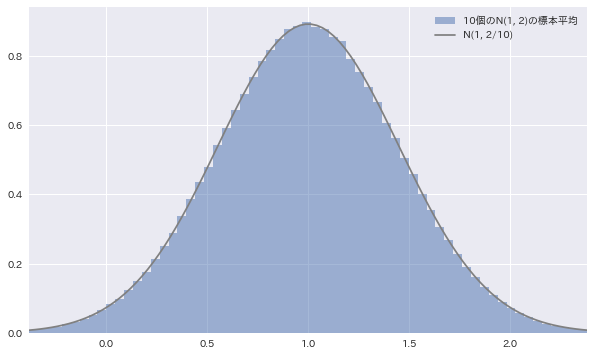

In [18]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

ax.hist(
    sample_mean, bins=100, density=True,
    alpha=0.5, label='10個のN(1, 2)の標本平均'
)
ax.plot(
    xs, rv_true.pdf(xs), label='N(1, 2/10)', color='gray'
)

ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
ax.legend()
plt.show()

#### 正規分布の標本平均の分布

$X_1, X_2, ..., X_n \sim i.i.d. ~ N(\mu, \sigma^2)$ としたとき、

$$
\overline{X} \sim N(\mu, \dfrac{\sigma^2}{n})
$$

が成り立つ。

### 9.3.2 ポアソン分布の標本平均の分布

- $n = 10$
- $X_1, X_2, ..., X_n \sim i.i.d. ~ Poi(3)$
- 標本平均 $\overline{X}$ を調べる。
- $\overline{X}$ の平均は「3」、分散は「3/10」

In [19]:
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(2.999, 0.300)

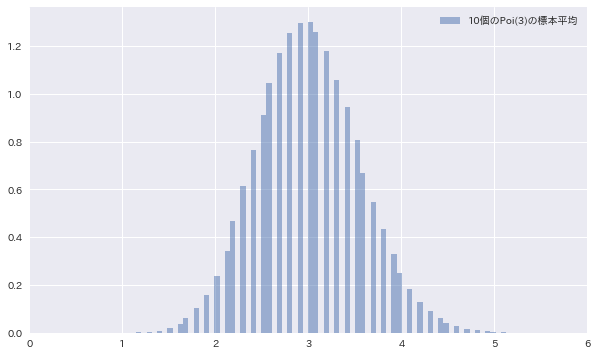

In [20]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(
    sample_mean, bins=100, density=True,
    alpha=0.5, label='10個のPoi(3)の標本平均'
)

ax.set_xlim(0, 6)
ax.legend()
plt.show()

### 9.3.3 中心極限定理

- 中心極限定理（central limit theorem）
  - 確率変数 $X_1, X_2, ..., X_n$ が互いに独立に、
  - 期待値が $\mu$ で分散が $\sigma^2$ の確率分布 $F$ にしたがっているとき、
  - $n$ が大きくなるにつれ標本平均 $\overline{X}$ の分布は正規分布 $N(\mu, \sigma^2/n)$ に近づく。

- $n = 1000$
- $X_1, X_2, ..., X_n \sim i.i.d. ~ Poi(3)$ としたときの標本平均の分布を考える

In [23]:
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

- 中心極限定理により、$\overline{X}$ は近似的に $N(3, 3/10000)$ に従うはず。
- $\overline{X}$ の標本データのヒストグラムと $N(3, 3/10000)$ の密度関数を図示する。

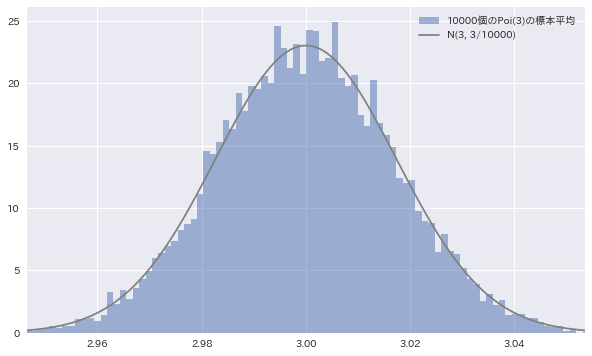

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(
    sample_mean, bins=100, density=True,
    alpha=0.5, label='10000個のPoi(3)の標本平均'
)
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
ax.legend()
plt.show()

- $n = 1000$
- $X_1, X_2, ..., X_n \sim i.i.d. ~ Bern(0.3)$ としたときの標本平均の分布を考える

In [25]:
p = 0.3
rv = stats.bernoulli(p)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(p, np.sqrt(p/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

- 中心極限定理により、$\overline{X}$ は近似的に $N(0.3, 0.3/10000)$ に従うはず。
- $\overline{X}$ の標本データのヒストグラムと $N(0.3, 0.3/10000)$ の密度関数を図示する。

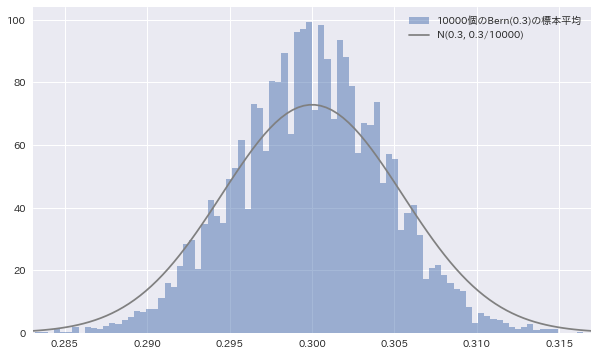

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(
    sample_mean, bins=100, density=True,
    alpha=0.5, label='10000個のBern(0.3)の標本平均'
)
ax.plot(xs, rv_true.pdf(xs), label='N(0.3, 0.3/10000)', color='gray')

ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
ax.legend()
plt.show()


In [31]:
# 図9.6 中心極限定理

def animate(nframe):
    num_trial = space[nframe]
    ax.clear()

    ax.hist(sample_mean[:num_trial], bins=100, density=True,
            alpha=0.5, label='10000個のPoi(3)の標本平均')
    ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')
    ax.set_title(f'試行回数：{num_trial}')
    ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
    ax.set_ylim(0, 25)


l = 3
rv = stats.poisson(l)
n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)
rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
num_frame = 50
space = np.logspace(1, 4, num_frame).astype(int)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
anim = ani.FuncAnimation(fig, animate, frames=num_frame)
js_anim = HTML(anim.to_jshtml())
plt.close()

js_anim

### 9.3.4 大数の法則

- 大数の法則（law of large numbers）
  - サンプルサイズを大きくすると、標本平均は母平均に収束することを主張している定理。
  - 確率変数 $X_1, X_2, ..., X_n$ が互いに独立に、
  - 平均が $\mu$ で分散が $\sigma^2$ であるような確率分布にしたがっているとき、
  - $n$ が大きくなるにつれ標本平均は $\mu$ に収束していく。

In [34]:
# サンプルサイズ10万の無作為抽出を4回行う

p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n, 4))
space = np.linspace(100, n , 50).astype(int)
plot_list = np.array([
    np.mean(sample[:sp], axis=0)
    for sp in space
]).T

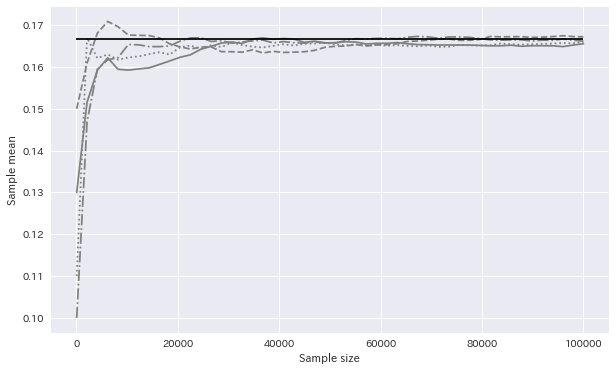

In [35]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')

ax.hlines(p, -1, n, 'k')
ax.set_xlabel('Sample size')
ax.set_ylabel('Sample mean')
plt.show()

In [32]:
# 図9.7 大数の法則

def animate(nframe):
    ax.clear()
    for pl, ls in zip(plot_list, linestyles):
        ax.plot(space[:nframe+1], pl[:nframe+1], ls=ls, color='gray')
    ax.hlines(p, -1, n, 'k')
    ax.set_xlabel('サンプルサイズ')
    ax.set_ylabel('標本平均')


p = 1/6
rv = stats.bernoulli(p)
n = int(1e5)
sample = rv.rvs((n, 4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0) for sp in space]).T
linestyles = ['-', '--', ':', '-.']

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
anim = ani.FuncAnimation(fig, animate, frames=num_frame-1)
js_anim = HTML(anim.to_jshtml())
plt.close()

js_anim